# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [69]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

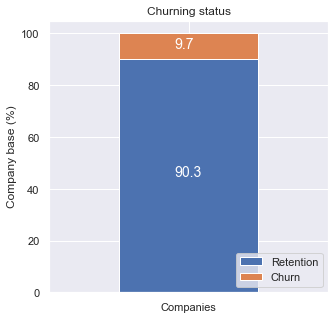

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [12]:
churn_total

,Companies
churn,
0,13187
1,1419


The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

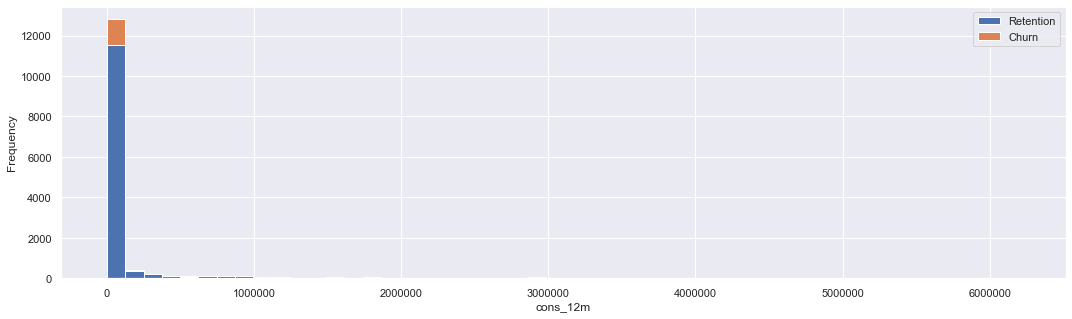

In [42]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

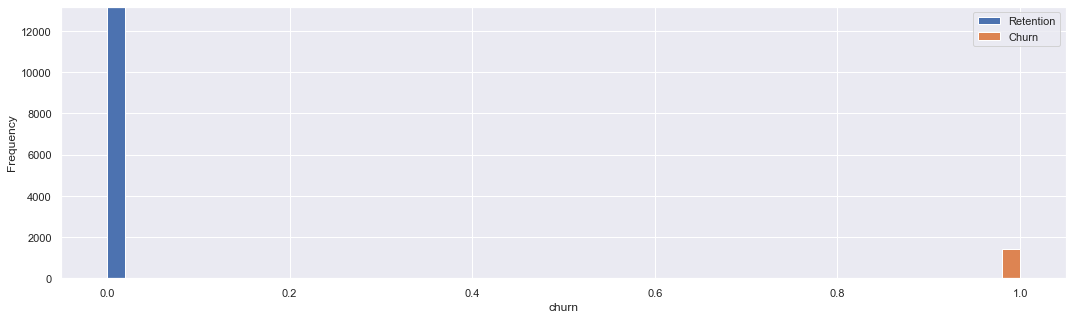

In [13]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'churn', axs)

To see if having gas influence on churning, we will plot the distribution of companies having gas subscription and see how many of them churn

In [25]:
consumption[['has_gas']]

,has_gas
0,t
1,f
2,f
3,f
4,f
...,...
14601,t
14602,f
14603,f
14604,f


We have at first to convert the format of this column from t : True and f : False to binary 1 and 0

In [43]:

# change has_gas to binary
consumption['has_gas'] = consumption['has_gas'].map({'t': 1, 'f': 0})

C:\Users\moham\AppData\Local\Temp\ipykernel_12176\3631202294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption['has_gas'] = consumption['has_gas'].map({'t': 1, 'f': 0})


In [27]:
consumption[['has_gas']]

,has_gas
0,1
1,0
2,0
3,0
4,0
...,...
14601,1
14602,0
14603,0
14604,0


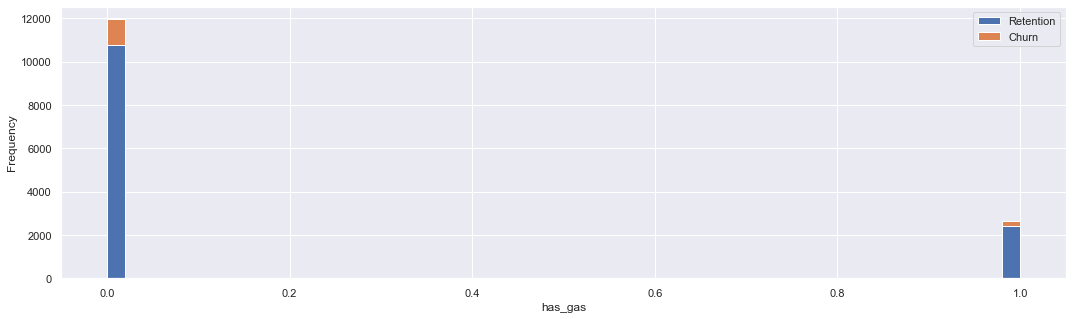

In [29]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'has_gas', axs)

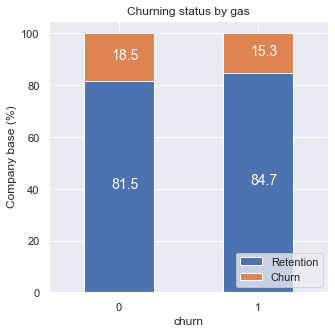

has_gas,0,1
churn,,
0,81.542428,18.457572
1,84.707541,15.292459


In [50]:
# pie chart of percentage of churned companies with gas and without gas
churn_gas = consumption.groupby(['churn', 'has_gas']).size().unstack()
churn_gas_percentage = churn_gas.div(churn_gas.sum(axis=1), axis=0) * 100

plot_stacked_bars(churn_gas_percentage, "Churning status by gas", (5, 5), legend_="lower right")

churn_gas_percentage


We can assume that there's no influence of having gas subscription or not on the churn of companies

let's see the categories of 'channel_sales'

In [57]:
client_df[['channel_sales']]

,channel_sales
0,foosdfpfkusacimwkcsosbicdxkicaua
1,MISSING
2,foosdfpfkusacimwkcsosbicdxkicaua
3,lmkebamcaaclubfxadlmueccxoimlema
4,MISSING
...,...
14601,foosdfpfkusacimwkcsosbicdxkicaua
14602,foosdfpfkusacimwkcsosbicdxkicaua
14603,foosdfpfkusacimwkcsosbicdxkicaua
14604,foosdfpfkusacimwkcsosbicdxkicaua


In [59]:
grouped = client_df.groupby(['channel_sales', 'churn']).size().unstack()
grouped



churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,NaN
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,NaN
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [70]:
# concvert channel_sales to 8 categories
client_df['channel_sales'] = client_df['channel_sales'].map({'epumfxlbckeskwekxbiuasklxalciiuu': 1,
'ewpakwlliwisiwduibdlfmalxowmwpci': 2,
'fixdbufsefwooaasfcxdxadsiekoceaa': 3,
'foosdfpfkusacimwkcsosbicdxkicaua': 4,
'lmkebamcaaclubfxadlmueccxoimlema': 5,
'sddiedcslfslkckwlfkdpoeeailfpeds': 6,
'usilxuppasemubllopkaafesmlibmsdf': 7,
'MISSING': 8})

client_df[['channel_sales']]

,channel_sales
0,4
1,8
2,4
3,5
4,8
...,...
14601,4
14602,4
14603,4
14604,4


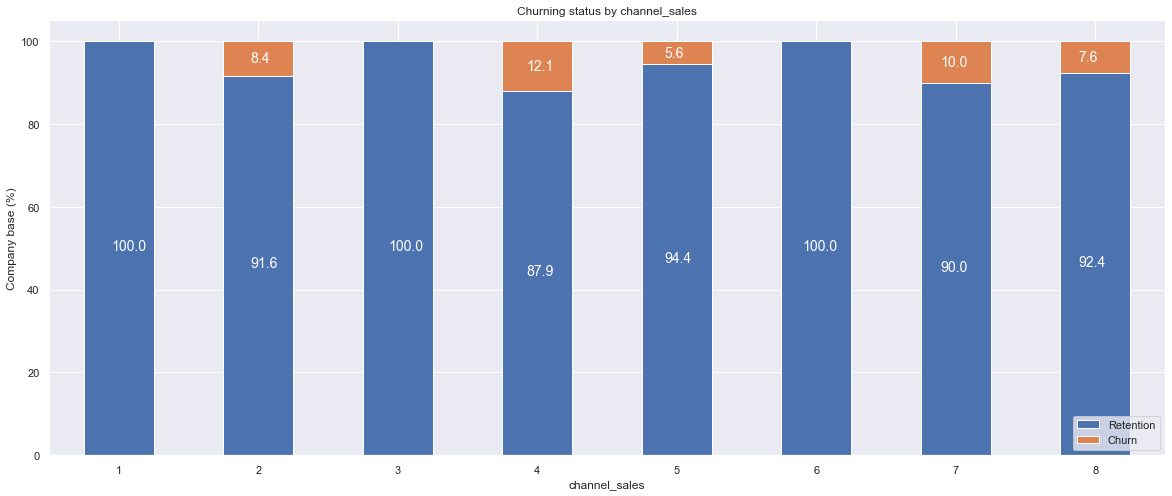

churn,0,1
channel_sales,,
1,100.000000,NaN
2,91.601344,8.398656
3,100.000000,NaN
4,87.859046,12.140954
5,94.411286,5.588714
6,100.000000,NaN
7,89.963636,10.036364
8,92.402685,7.597315


In [71]:
# pie chart of percentage of churned companies of each channel_sales
churn_channel_sales = client_df.groupby(['channel_sales', 'churn']).size().unstack()
churn_channel_sales_percentage = churn_channel_sales.div(churn_channel_sales.sum(axis=1), axis=0) * 100

plot_stacked_bars(churn_channel_sales_percentage, "Churning status by channel_sales", (20,8), legend_="lower right")

churn_channel_sales_percentage

In [72]:
churn_channel_sales

churn,0,1
channel_sales,,
1,3.0,NaN
2,818.0,75.0
3,2.0,NaN
4,5934.0,820.0
5,1740.0,103.0
6,11.0,NaN
7,1237.0,138.0
8,3442.0,283.0


We can assume that some types of channels have more churn than others

But still there is no real correlation between these variables and churns


# Feature Engineering

In [89]:
# join the two dataframes using id of companies as key
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')
df = pd.merge(client_df, price_df, on='id')

In [90]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [92]:
# drop some columns
df = df.drop(['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal','price_date'], axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   channel_sales                   175149 non-null  object 
 1   cons_12m                        175149 non-null  int64  
 2   cons_gas_12m                    175149 non-null  int64  
 3   cons_last_month                 175149 non-null  int64  
 4   forecast_cons_12m               175149 non-null  float64
 5   forecast_cons_year              175149 non-null  int64  
 6   forecast_discount_energy        175149 non-null  float64
 7   forecast_meter_rent_12m         175149 non-null  float64
 8   forecast_price_energy_off_peak  175149 non-null  float64
 9   forecast_price_energy_peak      175149 non-null  float64
 10  forecast_price_pow_off_peak     175149 non-null  float64
 11  has_gas                         175149 non-null  object 
 12  imp_cons        

In [93]:
# convert object variables to numeric

df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up','has_gas'])


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 40 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   cons_12m                                        175149 non-null  int64  
 1   cons_gas_12m                                    175149 non-null  int64  
 2   cons_last_month                                 175149 non-null  int64  
 3   forecast_cons_12m                               175149 non-null  float64
 4   forecast_cons_year                              175149 non-null  int64  
 5   forecast_discount_energy                        175149 non-null  float64
 6   forecast_meter_rent_12m                         175149 non-null  float64
 7   forecast_price_energy_off_peak                  175149 non-null  float64
 8   forecast_price_energy_peak                      175149 non-null  float64
 9   forecast_price_pow_off_pea

In [95]:
# use correlation matrix to find the most important features
corr = df.corr()
corr

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,has_gas_f,has_gas_t
cons_12m,1.000000,0.488253,0.968209,0.194080,0.167141,-0.043291,0.065275,-0.007696,0.145928,-0.026534,...,-0.006761,-0.078476,-0.010292,-0.002252,0.085591,-0.032969,-0.049456,-0.001971,-0.212934,0.212934
cons_gas_12m,0.488253,1.000000,0.506883,0.084520,0.081010,-0.012581,0.041314,-0.017550,0.073919,-0.020483,...,-0.004715,-0.038224,-0.007583,-0.001427,0.040431,-0.024562,-0.015575,-0.002017,-0.359617,0.359617
cons_last_month,0.968209,0.506883,1.000000,0.177888,0.193613,-0.040883,0.057491,-0.005150,0.136821,-0.022990,...,-0.006126,-0.072315,-0.009854,-0.002070,0.077937,-0.027049,-0.047452,-0.000185,-0.210648,0.210648
forecast_cons_12m,0.194080,0.084520,0.177888,1.000000,0.647775,0.058536,0.305657,-0.135549,0.254101,-0.018356,...,0.003416,-0.063670,0.024137,-0.004823,-0.070877,0.026356,0.039906,-0.003775,-0.097833,0.097833
forecast_cons_year,0.167141,0.081010,0.193613,0.647775,1.000000,0.008551,0.276083,-0.157965,0.251016,-0.044118,...,0.002364,-0.056157,0.019362,-0.003567,-0.037447,0.027549,0.008954,0.000736,-0.064952,0.064952
forecast_discount_energy,-0.043291,-0.012581,-0.040883,0.058536,0.008551,1.000000,-0.008348,0.353681,0.059419,0.047996,...,-0.005178,0.033501,0.010193,-0.001567,-0.059732,-0.029785,0.077689,-0.002216,-0.005245,0.005245
forecast_meter_rent_12m,0.065275,0.041314,0.057491,0.305657,0.276083,-0.008348,1.000000,-0.579323,0.706459,-0.203200,...,-0.012277,-0.072505,0.003825,-0.006537,-0.105756,0.055090,0.050837,-0.006572,-0.052704,0.052704
forecast_price_energy_off_peak,-0.007696,-0.017550,-0.005150,-0.135549,-0.157965,0.353681,-0.579323,1.000000,-0.329957,0.630472,...,0.003098,0.096741,0.003112,0.002560,0.120450,-0.081181,-0.043679,0.009204,0.032653,-0.032653
forecast_price_energy_peak,0.145928,0.073919,0.136821,0.254101,0.251016,0.059419,0.706459,-0.329957,1.000000,-0.241893,...,-0.013927,-0.083392,0.008268,-0.008523,-0.007685,0.054120,-0.038439,-0.001484,-0.064593,0.064593
forecast_price_pow_off_peak,-0.026534,-0.020483,-0.022990,-0.018356,-0.044118,0.047996,-0.203200,0.630472,-0.241893,1.000000,...,0.003064,0.056044,0.011853,0.002179,0.064252,-0.006070,-0.055298,0.005039,0.026040,-0.026040


<AxesSubplot:>

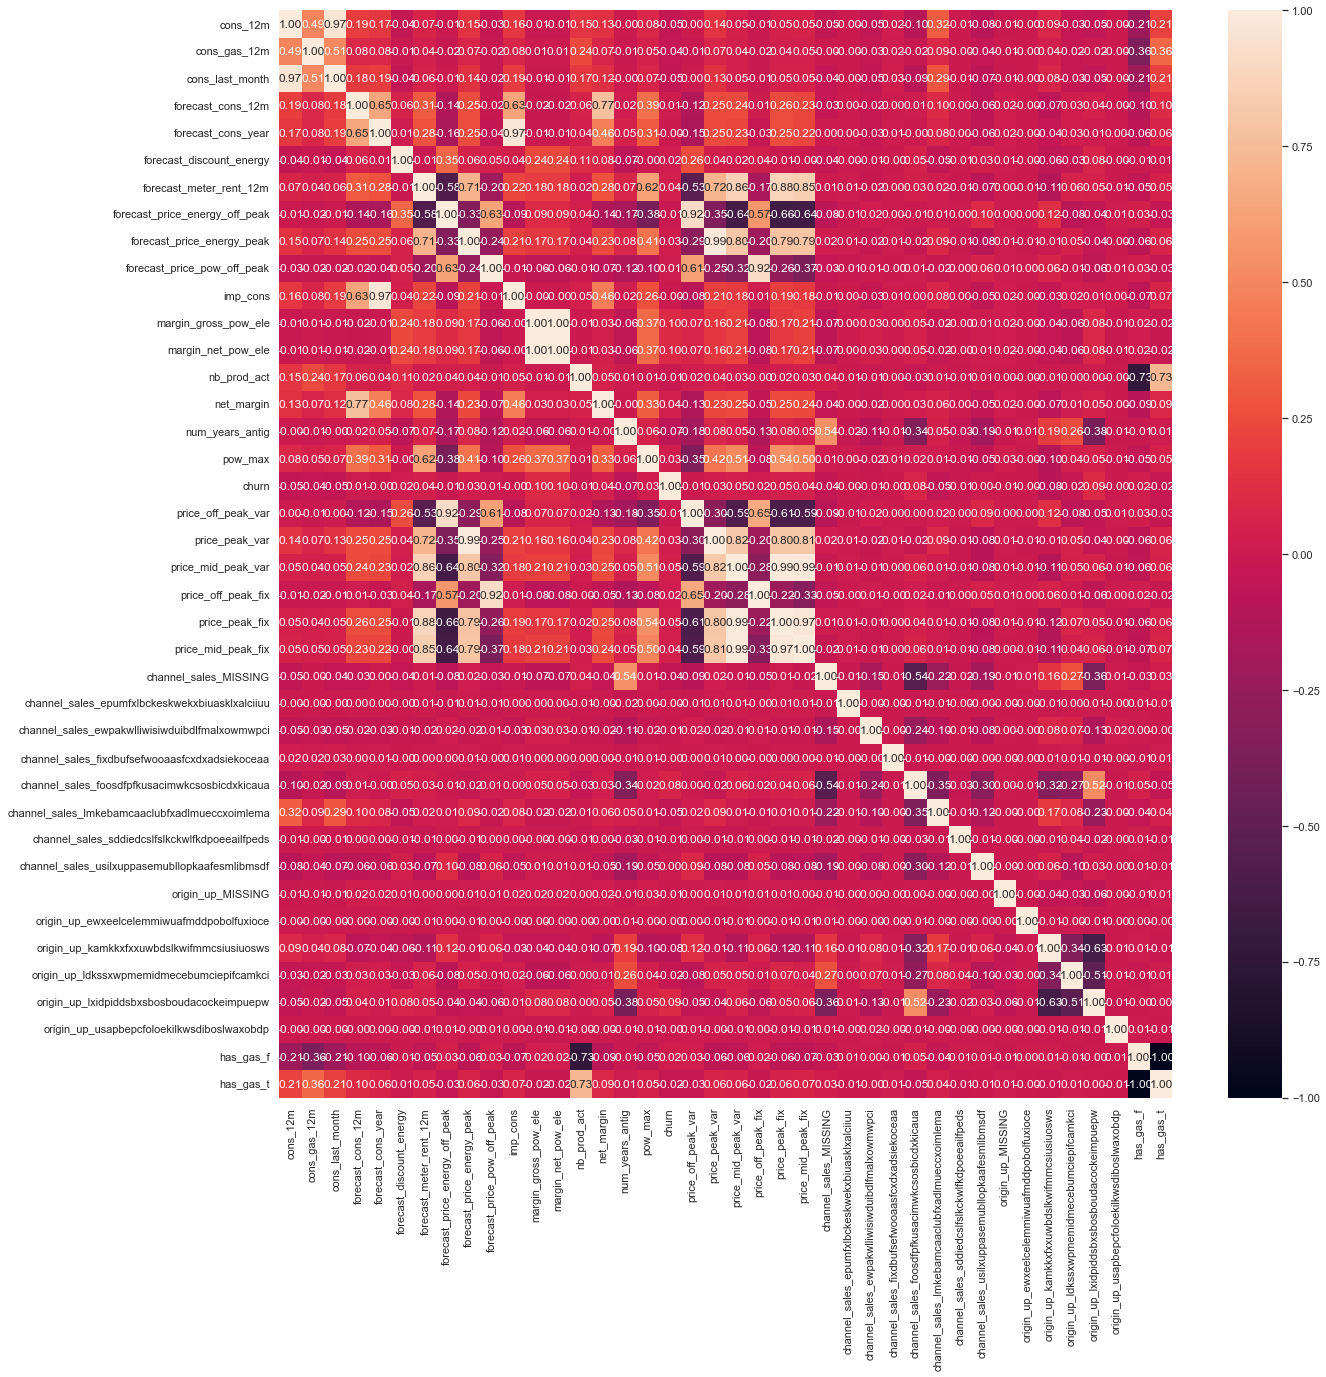

In [96]:
# plot correlation matrix using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')



<AxesSubplot:>

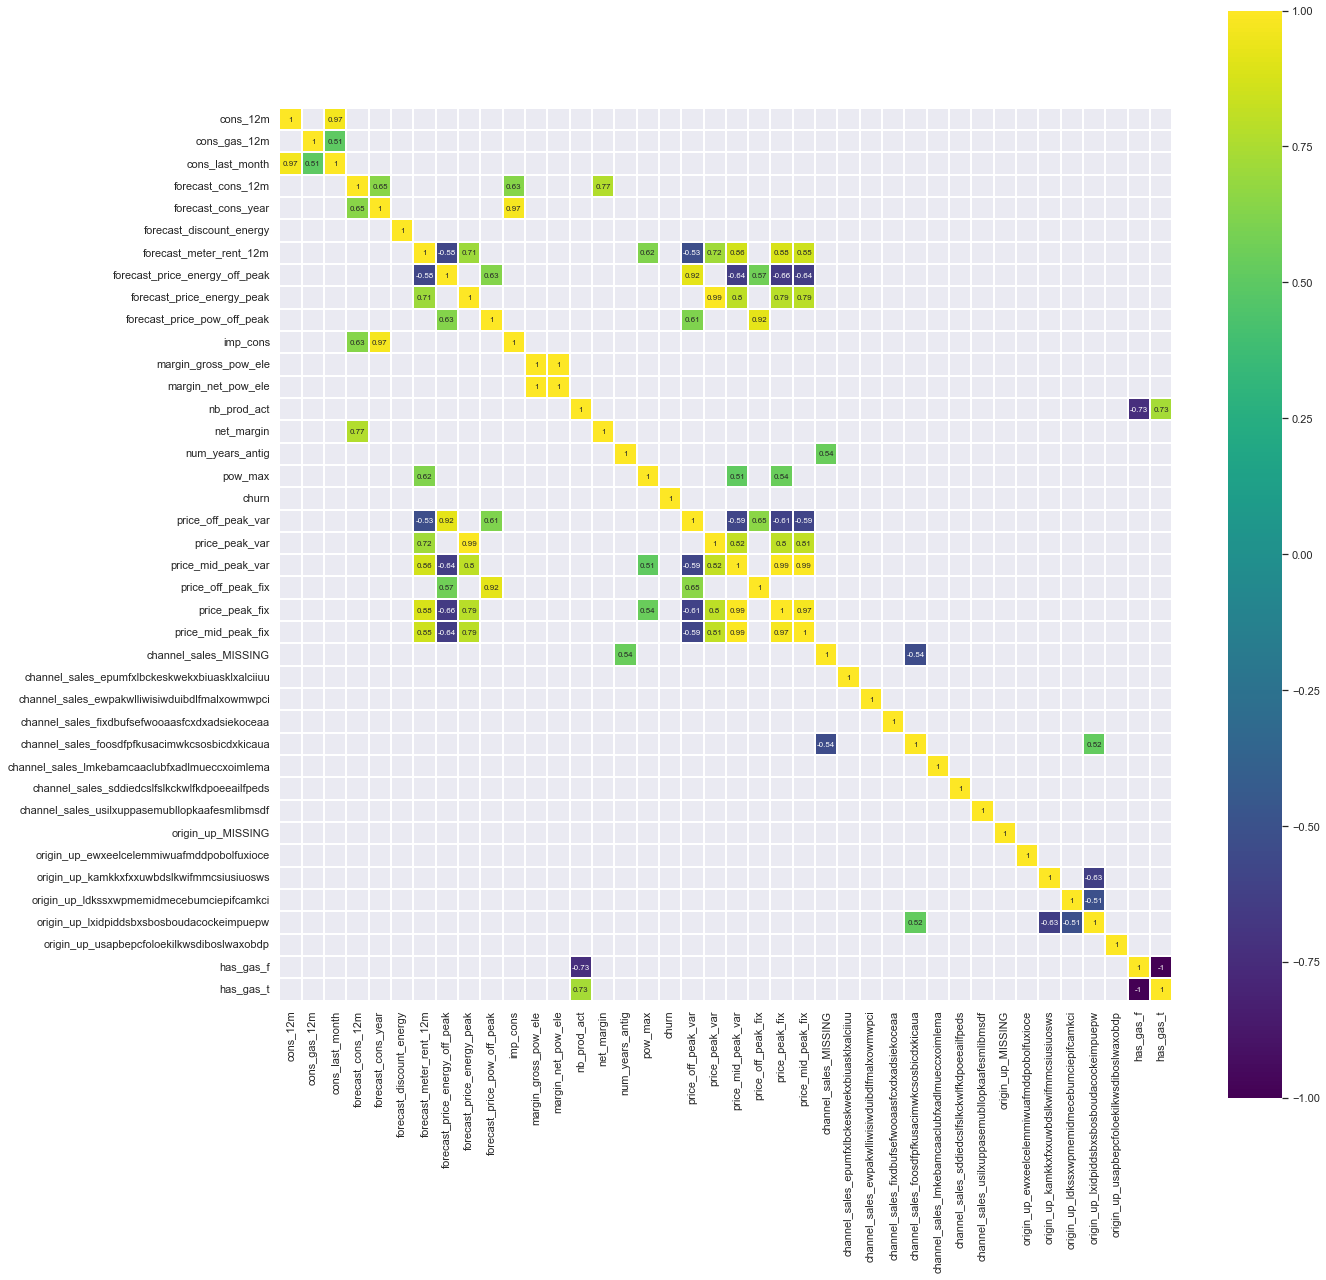

In [97]:
# plot high correlation features
plt.figure(figsize=(20, 20))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [98]:
# drop some columns which exhibit a high correlation with other independent features
df = df.drop(['cons_12m', 'imp_cons', 'forecast_price_energy_peak'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 37 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   cons_gas_12m                                    175149 non-null  int64  
 1   cons_last_month                                 175149 non-null  int64  
 2   forecast_cons_12m                               175149 non-null  float64
 3   forecast_cons_year                              175149 non-null  int64  
 4   forecast_discount_energy                        175149 non-null  float64
 5   forecast_meter_rent_12m                         175149 non-null  float64
 6   forecast_price_energy_off_peak                  175149 non-null  float64
 7   forecast_price_pow_off_peak                     175149 non-null  float64
 8   margin_gross_pow_ele                            175149 non-null  float64
 9   margin_net_pow_ele        

<AxesSubplot:>

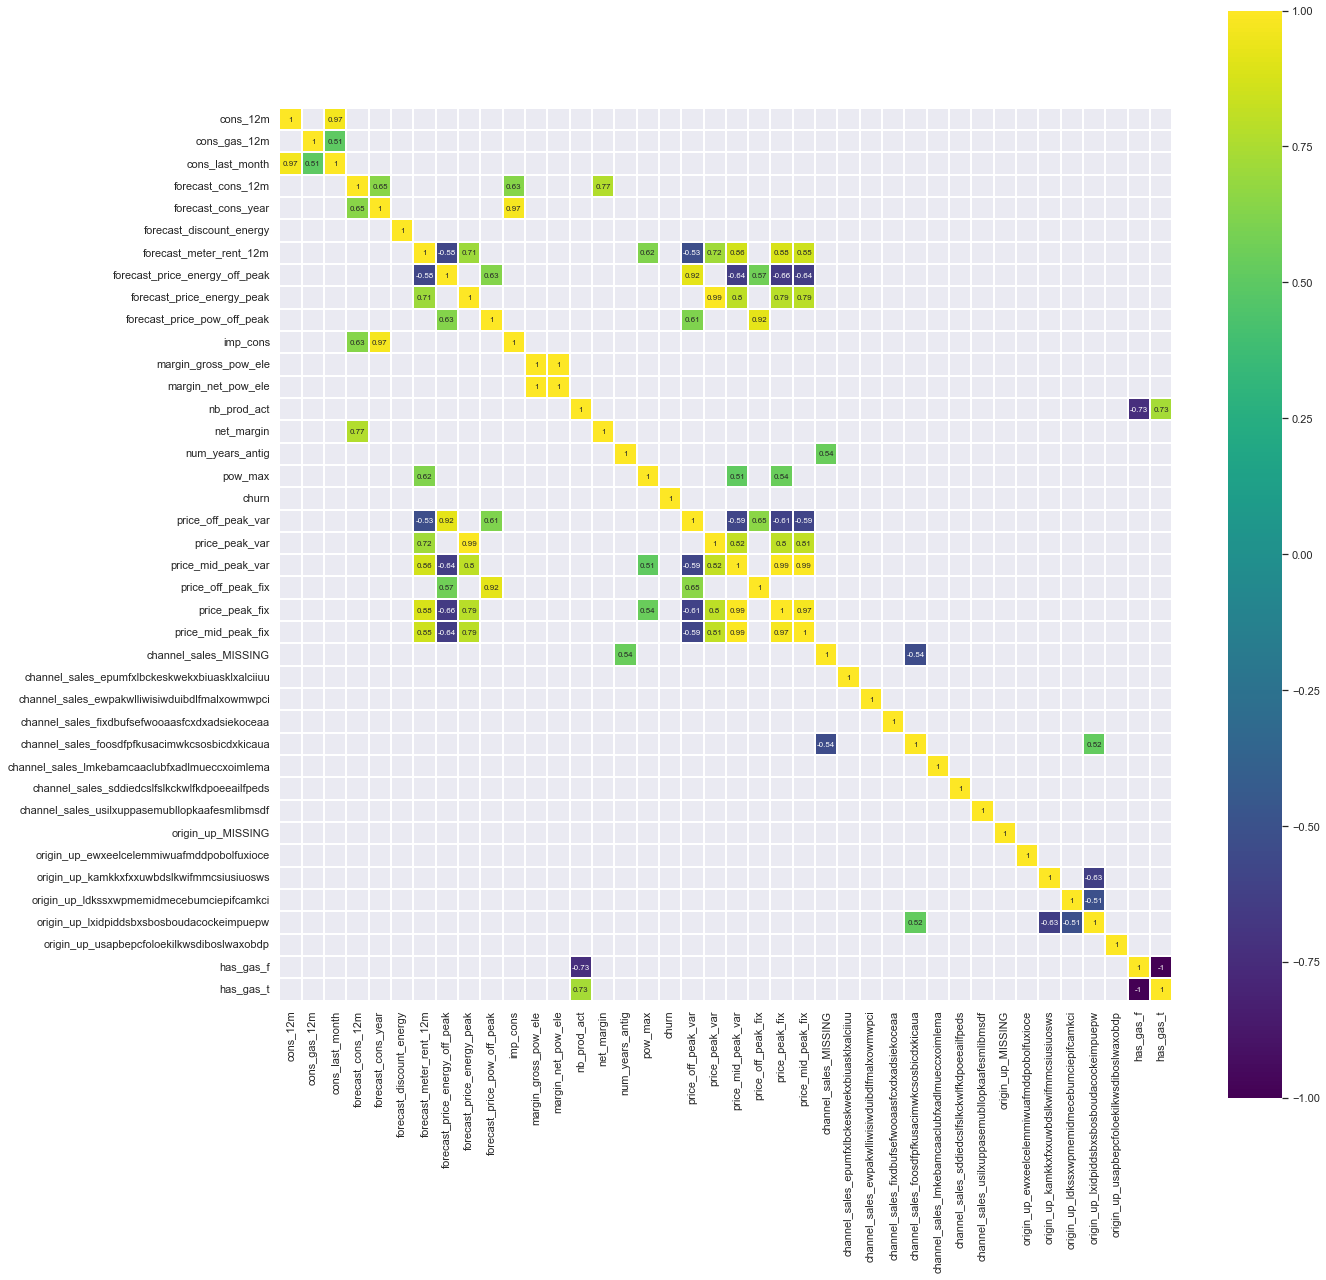

In [99]:
# plot high correlation features
plt.figure(figsize=(20, 20))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

from all what we presented, there is no serious correlation between anay independant variable and churn rates

Therefore, churn is not related to price sensitivity 


### Key findings

1. About 9.72% of customers changed providers.

2. Numeric variables on consumption are highly skewed.

3. Changes in prices does not affect customer churn.

### Suggestions

1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.

2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that.

3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn.